<a href="https://colab.research.google.com/github/asishdash/LLM_demo/blob/main/chatbot_langchain_openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q langchain pypdf pandas matplotlib tiktoken textract transformers openai faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 22.

In [2]:
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.9 MB/s eta 0:00:00


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

In [4]:
os.environ["OPENAI_API_KEY"] = ""

In [7]:
loader = PyPDFLoader("/content/sample_data/Guy_Ritchie.pdf")
pages = loader.load_and_split()
print(pages[0].page_content)

09/06/24, 10:59 PMGuy Ritchie - Wikipedia
Page 1 of 21https://en.wikipedia.org/wiki/Guy_RitchieGuy Ritchie
Ritchie in 2017BornGuy Stuart Ritchie10 September 1968Hatﬁeld, Hertfordshire,EnglandOccupationsFilm director · producer ·screenwriter ·businessmanYears active1995–presentSpousesMadonna(m. 2000; div. 2008)Jacqui Ainsley (m. 2015)Children5
Guy RitchieGuy Stuart Ritchie (born 10 September 1968)[1][2] isan English film director, producer and screenwriter. Hiswork includes British gangster films, and the SherlockHolmes films starring Robert Downey Jr.Ritchie left school at the age of 15, and worked in entry-level jobs in the film industry before going on to directtelevision commercials. In 1995, he directed a short film,The Hard Case, followed by the crime comedy Lock,Stock and Two Smoking Barrels (1998), his feature-length directorial debut. He gained recognition with hissecond film, Snatch (2000), which found critical andcommercial success. Following Snatch, Ritchie directedSwept Awa

In [8]:
embeddings = OpenAIEmbeddings(openai_api_key= "" )

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [9]:
chunks = pages

In [10]:
db = FAISS.from_documents(chunks, embeddings)

In [11]:
query = "list the movies of Guy ritchie"

docs = db.similarity_search(query)


In [12]:
print(docs)

[Document(page_content="09/06/24, 10:59\u202fPMGuy Ritchie - Wikipedia\nPage 1 of 21https://en.wikipedia.org/wiki/Guy_RitchieGuy Ritchie\nRitchie in 2017BornGuy Stuart Ritchie10 September 1968Hatﬁeld, Hertfordshire,EnglandOccupationsFilm director · producer ·screenwriter ·businessmanYears\xa0active1995–presentSpousesMadonna(m.\xa02000; div.\xa02008)Jacqui Ainsley (m.\xa02015)Children5\nGuy RitchieGuy Stuart Ritchie (born 10 September 1968)[1][2] isan English film director, producer and screenwriter. Hiswork includes British gangster films, and the SherlockHolmes films starring Robert Downey Jr.Ritchie left school at the age of 15, and worked in entry-level jobs in the film industry before going on to directtelevision commercials. In 1995, he directed a short film,The Hard Case, followed by the crime comedy Lock,Stock and Two Smoking Barrels (1998), his feature-length directorial debut. He gained recognition with hissecond film, Snatch (2000), which found critical andcommercial success.

In [13]:
chain = load_qa_chain(OpenAI(temperature=0), chain_type="stuff")
query = "what is the birth date of guy ritchie"
docs = db.similarity_search(query)

chain.run(input_documents=docs, question=query)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


" Guy Ritchie's birth date is September 10, 1968."

In [14]:
from IPython.display import display
import ipywidgets as widgets

# Create conversation chain that uses our vectordb as retriver, this also allows for chat history management
qa = ConversationalRetrievalChain.from_llm(OpenAI(temperature=0.1), db.as_retriever())

In [15]:
chat_history = []

def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thank you for using the Chatbot!")
        return

    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))

    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="blue">Chatbot:</font></b> {result["answer"]}'))

print("Welcome to the PDFCHATBOT! Type 'exit' to stop.")

input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)

Welcome to the PDFCHATBOT! Type 'exit' to stop.


Text(value='', placeholder='Please enter your question:')

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


HTML(value='<b>User:</b> who is guy ritchie , explain in one line')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Guy Ritchie is an English film director, producer, and …

HTML(value='<b>User:</b>  has he won the')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Yes, Guy Ritchie has won several awards for his work. H…

In [17]:
# Advanced method - Split by chunk

# Step 1: Convert PDF to text
import textract
doc = textract.process("/content/sample_data/Guy_Ritchie.pdf")

# Step 2: Save to .txt and reopen (helps prevent issues)
with open('/content/ritchie.txt', 'w') as f:
    f.write(doc.decode('utf-8'))

with open('/content/ritchie.txt', 'r') as f:
    text = f.read()

# Step 3: Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# Step 4: Split text into chunks
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 40,
    chunk_overlap  = 24,
    length_function = count_tokens,
)

chunks = text_splitter.create_documents([text])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

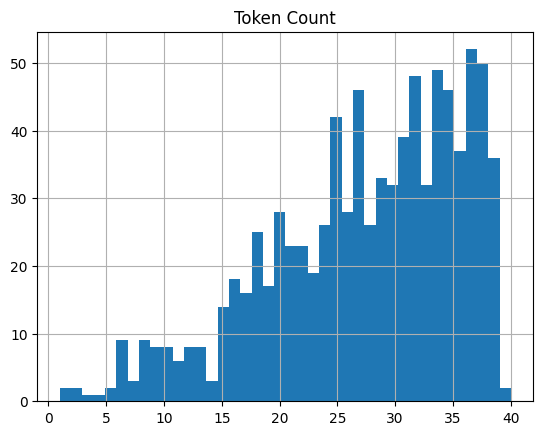

In [18]:
# Quick data visualization to ensure chunking was successful

# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
df.hist(bins=40, )

# Show the plot
plt.show()